In [1]:
!pip install -U spacy

  Attempting uninstall: smart-open
    Found existing installation: smart-open 5.1.0
    Uninstalling smart-open-5.1.0:
      Successfully uninstalled smart-open-5.1.0


In [2]:
!python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
!pip install wordcloud

In [4]:
# Perform sentimental analysis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

In [5]:
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [7]:
data=pd.read_csv('C:/Users/lenovo/Downloads/Elon_musk.csv',encoding='latin1')
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [8]:
Elon_musk=[]

In [10]:
Em=[]

In [11]:
for E in range(1,10):
  Em=[] 

In [12]:
data.drop(['Unnamed: 0'],inplace=True,axis=1)
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [13]:
#Text Preprocessing

In [14]:
data=[Text.strip() for Text in data.Text] # remove both the leading and the trailing characters
data=[Text for Text in data if Text] # removes empty strings, because they are considered in Python as False
data

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [15]:
# Joining the list into one string/text
data_text=' '.join(data)
data_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [17]:
#Punctuation
no_punc_text = data_text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [22]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox  Frodo was the underdoge\nAll thought he would fail\nHimself most of all  OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest  geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha  freewalletorg Any crypto wallet that won\x92t give you your private keys should

In [28]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [31]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['kunalb11', 'I\x92m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'GiveDirectly', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'kanyewest', 'geoffkeighley', 'UnrealEngine', 'It\x92s', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil'

In [33]:
# Tokens count
len(text_tokens)

20423

In [45]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'kanyewest', 'geoffkeighley', 'UnrealEngine', 'It\x92s', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'JoshManMode', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'Thanks', 'fixing', 'freewalletorg', 'Please', 'unlock', 'account', 'AstroJordy', 'U0001F923U0001

In [46]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words)

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'owensparks', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'sent', 'just', 'agree', 'clubhouse', 'kanyewest', 'geoffkeighley', 'unrealengine', 'it\x92s', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'thanks', 'fixing', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'u0001f923u0001

In [54]:
#Stemmin
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'owenspark', 'flcnhvi', 'anonyx10', 'haha', 'thank', 'flcnhvi', 'anonyx10', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'alloc', 'the', 'entertain', 'outcom', 'like', 'givedirectli', 'just', 'sent', 'just', 'agre', 'clubhous', 'kanyewest', 'geoffkeighley', 'unrealengin', 'it\x92', 'get', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmod', 'he', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'pleas', 'unlock', 'account', 'astrojordi', 'u0001f923u0001f923', 'thi', 'true', 'power', 'haha', 'freewalletorg', 'ani', 'cr

In [55]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

kunalb11 im alien idaacarmack ray tracing cyberpunk hdr nextlevel have tried joerogan spotify great interview gtera27 doge underestimated teslacn congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself owensparks flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweets definitely represent realworld time allocation the entertaining outcome likely givedirectly just sent just agree clubhouse kanyewest geoffkeighley unrealengine its getting real bought dogecoin lil x toddler hodler joshmanmode he definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy u0001f923u0001f923 this true power haha freewalletorg any crypto wallet wont give private keys avoided costs freewalletorg your app sucks rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission ajtourville yes blkmdl3 rationaletienne adamklotz once predic

In [56]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimate', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'think', 'would', 'fail', 'himself', 'owenspark', 'flcnhvy', 'anonyx10', 'haha', 'thank', 'flcnhvy', 'anonyx10', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'send', 'just', 'agree', 'clubhouse', 'kanyew', 'geoffkeighley', 'unrealengine', 'it\x92s', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'u0001f923u0001f923', 'this', 'true', 'po

In [57]:
clean_tweets=' '.join(lemmas)
clean_tweets

'kunalb11 i\x92m alien idaacarmack ray trace cyberpunk hdr nextlevel have try joerogan spotify great interview gtera27 doge underestimate teslacn congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all think would fail himself owenspark flcnhvy anonyx10 haha thank flcnhvy anonyx10 indeed tweet definitely represent realworld time allocation the entertaining outcome likely givedirectly just send just agree clubhouse kanyew geoffkeighley unrealengine it\x92s get real buy dogecoin lil x toddler hodler joshmanmode he definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account astrojordy u0001f923u0001f923 this true power haha freewalletorg any crypto wallet won\x92t give private key avoid cost freewalletorg your app suck rt spacex nasa select falcon heavy launch first two element lunar gateway together one mission ajtourville yes blkmdl3 rationaletienne adamklotz once predict cash flow reasonably w

In [58]:
#Feature Extaction

In [59]:
#Using CountVectorizer

In [66]:
from sklearn.feature_extraction.text import CountVectorizer


In [68]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)
print(vectorizer.vocabulary_)

{'kunalb11': 2043, 'alien': 230, 'idaacarmack': 1782, 'ray': 2952, 'trace': 3820, 'cyberpunk': 960, 'hdr': 1670, 'nextlevel': 2492, 'have': 1664, 'try': 3854, 'joerogan': 1962, 'spotify': 3445, 'great': 1605, 'interview': 1891, 'gtera27': 1623, 'doge': 1113, 'underestimate': 3985, 'teslacn': 3668, 'congratulations': 855, 'tesla': 3662, 'china': 736, 'amazing': 255, 'execution': 1324, 'last': 2061, 'year': 4254, 'now': 2532, 'next': 2491, 'even': 1295, 'happy': 1651, 'new': 2488, 'ox': 2650, 'frodo': 1488, 'underdoge': 3984, 'all': 232, 'think': 3738, 'would': 4230, 'fail': 1360, 'himself': 1715, 'owenspark': 2646, 'flcnhvy': 1430, 'anonyx10': 284, 'haha': 1637, 'thank': 3705, 'indeed': 1831, 'tweet': 3874, 'definitely': 1015, 'represent': 3035, 'realworld': 2977, 'time': 3763, 'allocation': 234, 'the': 3712, 'entertaining': 1252, 'outcome': 2625, 'likely': 2123, 'givedirectly': 1575, 'just': 1990, 'send': 3221, 'agree': 201, 'clubhouse': 778, 'kanyew': 1999, 'geoffkeighley': 1553, 'unr

In [69]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray())

['23', '230', '24', '240am', '247teslanews', '25', '250', '250kw', '25d', '25gunsteslacom', '25k', '25th', '28', '28delayslater', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445pm', '448', '4530000', '45thspacewing', '4680', '479000', '48', '4d', '4th']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [70]:
print(X.toarray().shape)

(15123, 4288)


In [71]:
# CountVectorizer with N-grams (Bigrams & Trigrams)

In [75]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [76]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['actually', 'ajtourville', 'also', 'amp', 'austinbarnard45', 'big', 'car', 'cleantechnica', 'come', 'could', 'crew', 'day', 'dragon', 'earth', 'engine', 'ercxspace', 'erdayastronaut', 'evafoxu', 'exactly', 'falcon', 'felixschlang', 'first', 'flcnhvy', 'flight', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'idaacarmack', 'it', 'kristennetten', 'land', 'launch', 'lexfridman', 'like', 'lot', 'make', 'marcushousegame', 'maybe', 'mission', 'model', 'much', 'nasa', 'nasaspaceflight', 'need', 'neuralink', 'new', 'next', 'no', 'one', 'people', 'ppathole', 'pretty', 'probably', 'production', 'rationaletienne', 're', 'right', 'rt', 'soon', 'space', 'spacestation', 'spacex', 'starship', 'still', 'sure', 'take', 'tesla', 'teslaownerssv', 'teslarati', 'tesmaniancom', 'test', 'thank', 'that', 'the', 'there', 'thesheetztweetz', 'they', 'think', 'this', 'time', 'tobyliiiiiiiiii', 'true', 'u0001f923u0001f923', 'use', 'way', 'we', 'we re', 'well', 'wholemarsblog', 'will', 'work', 'would', 'yea

In [77]:
#TF-IDF Vectorizer

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [80]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['10', '100', '20', '2020', '28delayslater', '30', '60', 'able', 'absolutely', 'access', 'accurate', 'actually', 'adamklotz', 'add', 'ago', 'agree', 'ai', 'aim', 'air', 'ajtourville', 'all', 'almost', 'already', 'also', 'although', 'amazing', 'amp', 'and', 'apply', 'appreciate', 'archillect', 'around', 'article', 'as', 'astrobehnken', 'astrodoug', 'astrojordy', 'astronaut', 'at', 'austinbarnard45', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'benmezrich', 'berlin', 'berniesander', 'beta', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'build', 'but', 'buy', 'call', 'camera', 'can', 'car', 'cargo', 'casparstanley', 'cbass3d', 'cell', 'change', 'cleantechnica', 'close', 'cold', 'come', 'company', 'complete', 'computer', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'create', 'crew', 'crew1', 'critical', 'curevac', 'cyberpunkgame', 'day', 'deep', 'definitely', 'delivery', 'design', 'detail', 'didn', 'differ

In [81]:
#Generate Word Cloud

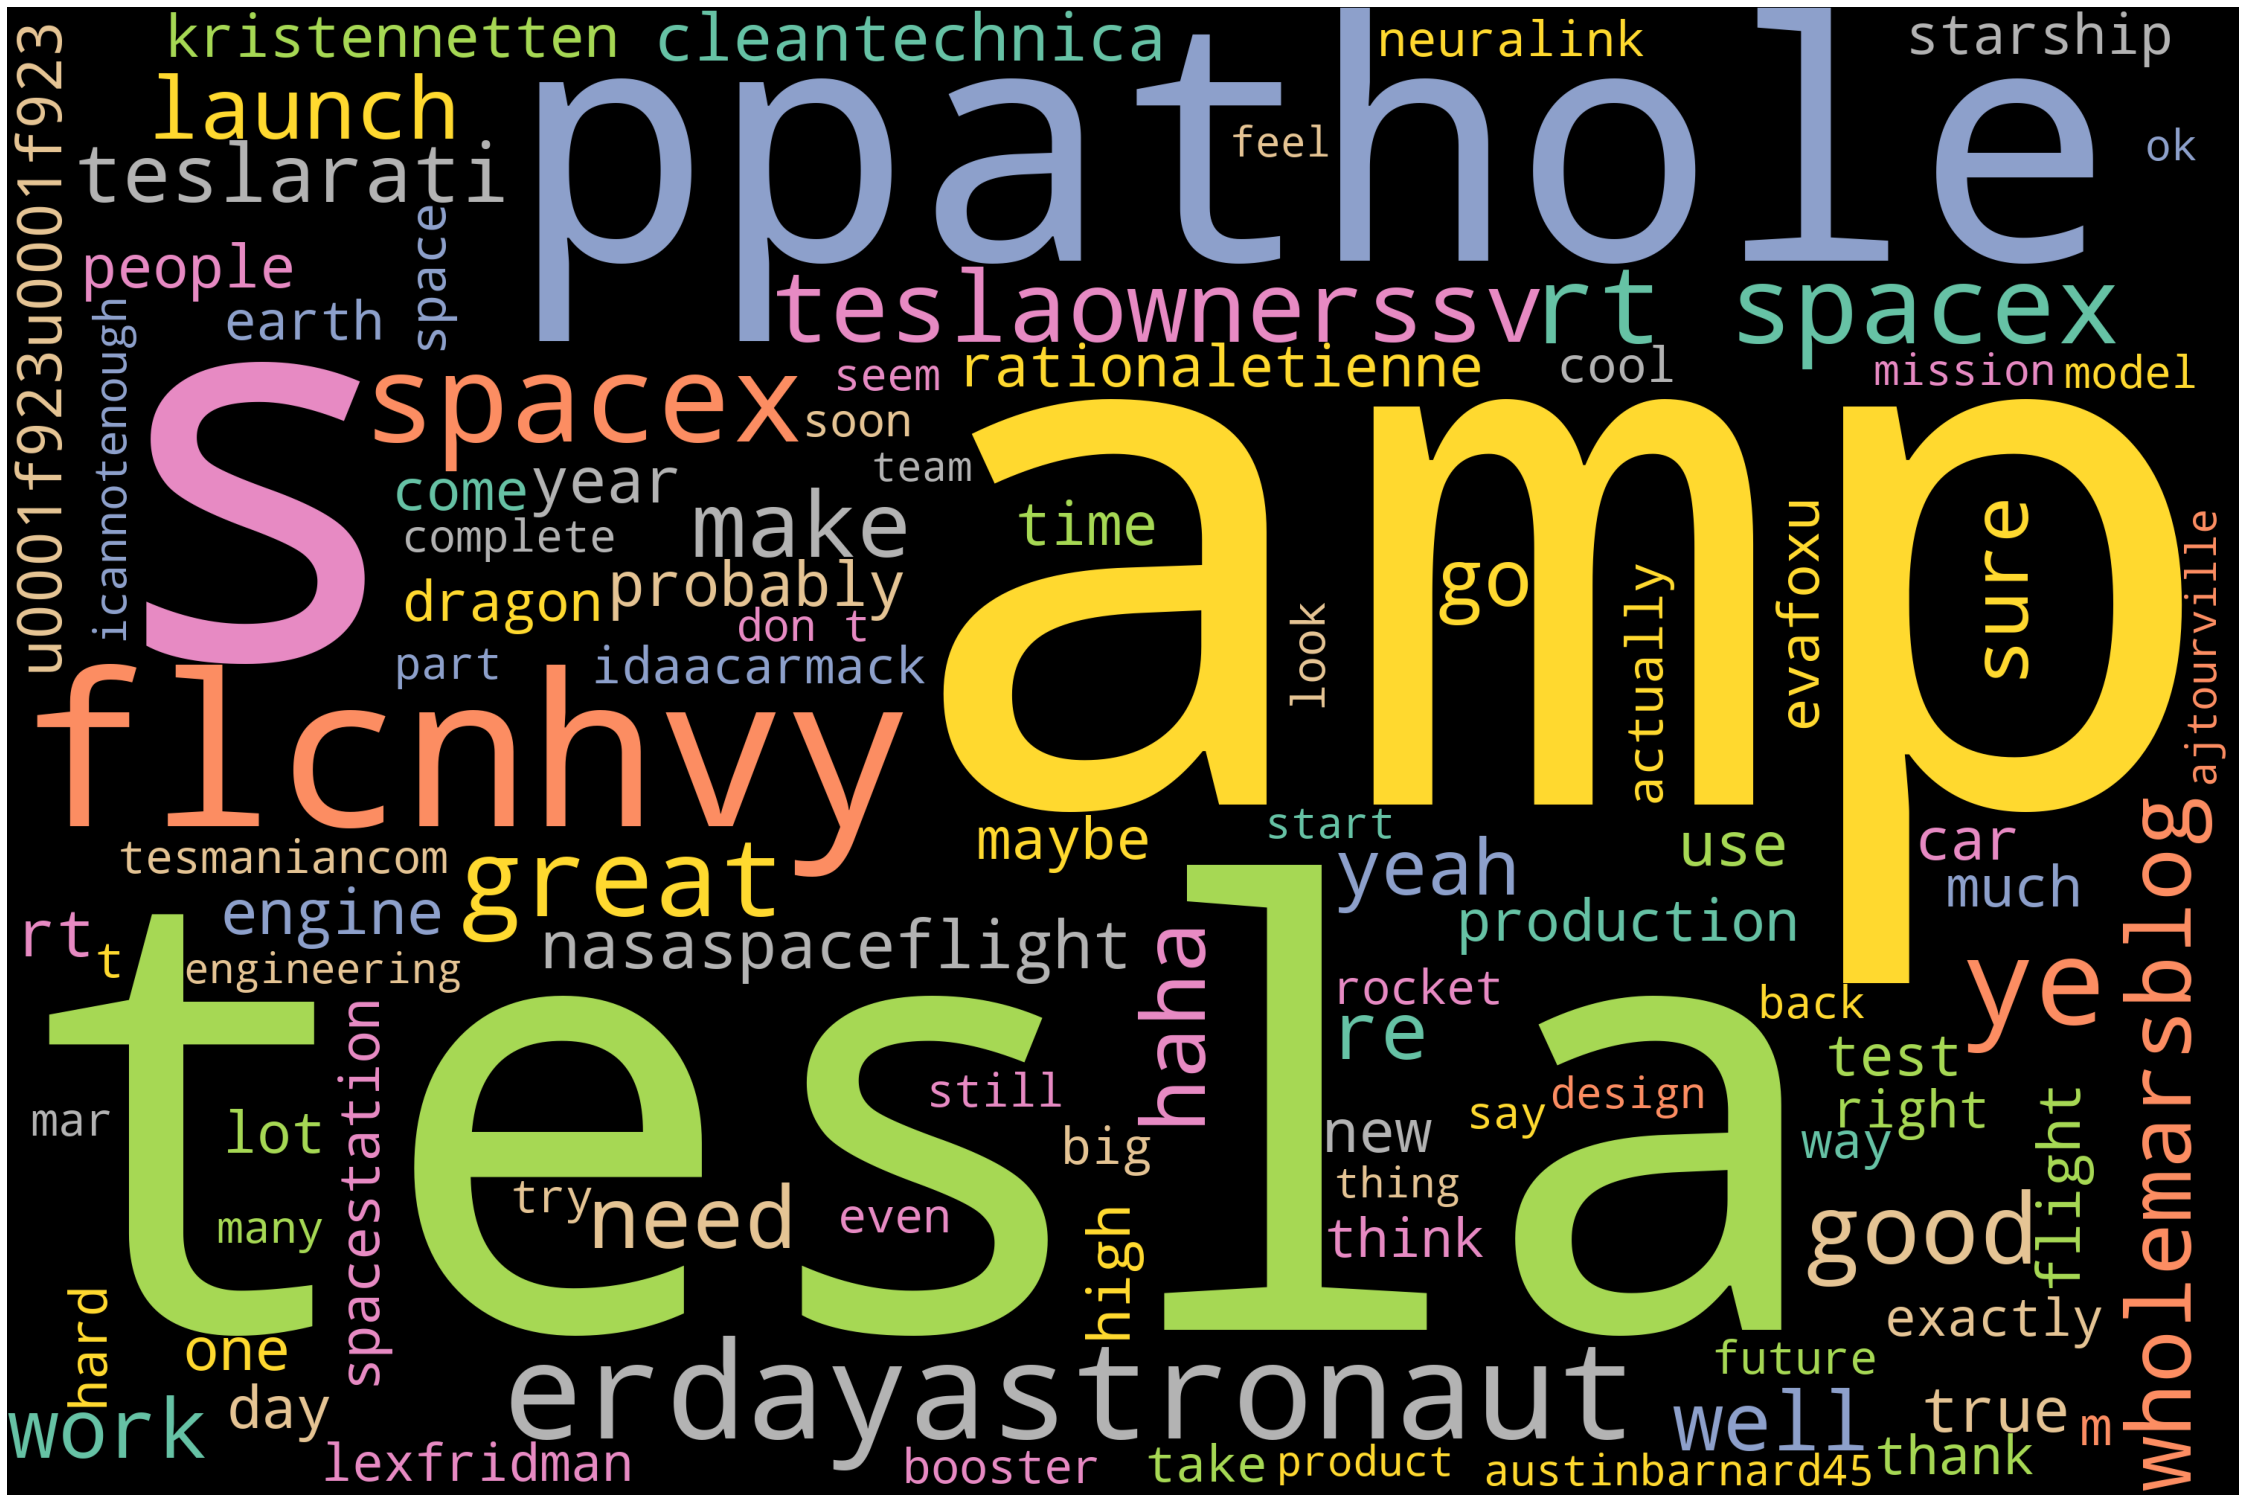

In [91]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate wordcloud

stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(clean_tweets)
# Plot
plot_cloud(wordcloud)

In [92]:
#Named Entity Recognition (NER)

In [97]:
##Part Of Speech Tagging

nlp = spacy.load("en_core_web_sm")
one_block =clean_tweets
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [98]:
for token in doc_block:
    print(token, token.pos_)

kunalb11 PROPN
im PROPN
alien PROPN
idaacarmack PROPN
ray PROPN
trace NOUN
cyberpunk PROPN
hdr PROPN
nextlevel NOUN
have AUX
try VERB
joerogan PROPN
spotify VERB
great ADJ
interview NOUN
gtera27 NOUN
doge ADJ
underestimate ADJ
teslacn PROPN
congratulations PROPN
tesla PROPN
china PROPN
amazing ADJ
execution NOUN
last ADJ
year NOUN
now ADV
next ADV
even ADV
happy ADJ
new ADJ
year NOUN
ox NOUN
frodo NOUN
underdoge PROPN
all PRON
think VERB
would AUX
fail VERB
himself PRON
owenspark PROPN
flcnhvy PROPN
anonyx10 PROPN
haha PROPN
thank VERB
flcnhvy PROPN
anonyx10 PROPN
indeed ADV
tweet NOUN
definitely ADV
represent VERB
realworld PROPN
time NOUN
allocation NOUN
the DET
entertaining ADJ
outcome NOUN
likely ADV
givedirectly ADV
just ADV
send VERB
just ADV
agree VERB
clubhouse NOUN
kanyew PROPN
geoffkeighley PROPN
unrealengine PROPN
its PROPN
get VERB
real ADJ
buy NOUN
dogecoin NOUN
lil PROPN
x PROPN
toddler NOUN
hodler NOUN
joshmanmode PROPN
he PRON
definitely ADV
issue VERB
sentencing NOUN

In [100]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs)

['trace', 'nextlevel', 'try', 'spotify', 'interview', 'gtera27', 'execution', 'year', 'year', 'ox', 'frodo', 'think', 'fail', 'thank', 'tweet', 'represent', 'time', 'allocation', 'outcome', 'send', 'agree', 'clubhouse', 'get', 'buy', 'dogecoin', 'toddler', 'hodler', 'issue', 'sentencing', 'seem', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'unlock', 'account', 'astrojordy', 'u0001f923u0001f923', 'power', 'haha', 'freewalletorg', 'crypto', 'wallet', 'give', 'avoid', 'cost', 'freewalletorg', 'app', 'spacex', 'select', 'falcon', 'launch', 'gateway', 'mission', 'adamklotz', 'predict', 'cash', 'flow', 'starlink', 'starlink', 'endeavor', 'spacex', 'pass', 'chasm', 'cash', 'flow', 'year', 'idaacarmack', 'cost', 'ton', 'carbon', 'sequester', 'value', 'product', 'make', 'scalable', 'g', 'price', 'country', 'difference', 'tax', 'amp', 'shipping', 'tobyliiiiiiiiii', 'intend', 'earth', 'idea', 'apply', 'coindesk', 'danzpalmer', 'xprize', 'team', 'manage', 'carbon', 'capture', 'sruhle', 'rece

In [101]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df

,word,count
0,spacex,191
1,amp,148
2,launch,64
3,make,64
4,tesla,49
...,...,...
2236,priority,1
2237,propaganda,1
2238,click,1
2239,altho,1


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

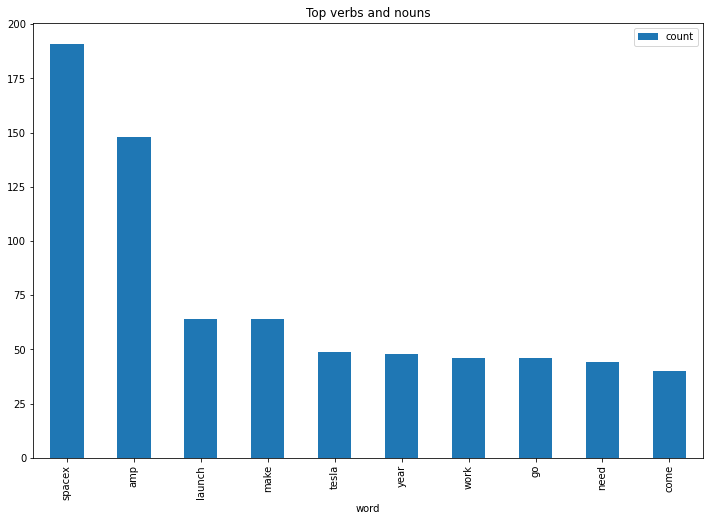

In [104]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [105]:
#Emotion Mining - Sentiment Analysis

In [109]:
from nltk import tokenize
sentence = tokenize.sent_tokenize(" ".join(data))
sentence

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [110]:
sent_df=pd.DataFrame(sentence,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...
